In [1]:

import warnings
warnings.filterwarnings(action='ignore', category=FutureWarning)

### Spaceship titanic Transported predicted

#### Feature Description


PassengerId - A unique Id for each passenger. Each Id takes the form gggg_pp where gggg indicates a group the passenger is travelling with and pp is their number within the group. People in a group are often family members, but not always.

HomePlanet - The planet the passenger departed from, typically their planet of permanent residence.

CryoSleep - Indicates whether the passenger elected to be put into suspended animation for the duration of the voyage. Passengers in cryosleep are confined to their cabins.

Cabin - The cabin number where the passenger is staying. Takes the form deck/num/side, where side can be either P for Port or S for Starboard.

Destination - The planet the passenger will be debarking to.

Age - The age of the passenger.

VIP - Whether the passenger has paid for special VIP service during the voyage.

RoomService, FoodCourt, ShoppingMall, Spa, VRDeck - Amount the passenger has billed at each of the Spaceship Titanic's many luxury amenities.

Name - The first and last names of the passenger.

Transported - Whether the passenger was transported to another dimension. This is the target, the column you are trying to predict.

PassengerId - Id for each passenger in the test set.

Transported - The target. For each passenger, predict either True or False.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [6]:
# Importing test data Set
spaceship_test= pd.read_csv('C:/Users/hp/Downloads/spaceship_titanic_test.csv')

In [7]:
spaceship_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4277 entries, 0 to 4276
Data columns (total 13 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   PassengerId   4277 non-null   object 
 1   HomePlanet    4190 non-null   object 
 2   CryoSleep     4184 non-null   object 
 3   Cabin         4177 non-null   object 
 4   Destination   4185 non-null   object 
 5   Age           4186 non-null   float64
 6   VIP           4184 non-null   object 
 7   RoomService   4195 non-null   float64
 8   FoodCourt     4171 non-null   float64
 9   ShoppingMall  4179 non-null   float64
 10  Spa           4176 non-null   float64
 11  VRDeck        4197 non-null   float64
 12  Name          4183 non-null   object 
dtypes: float64(6), object(7)
memory usage: 434.5+ KB


In [8]:
# Importing TRAIN Data set
spaceship = pd.read_csv("C:/Users/hp/Downloads/spaceship_titanic_train.csv")
spaceship.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [9]:
spaceship.select_dtypes(include='float').columns

Index(['Age', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck'], dtype='object')

In [10]:
# 13 Features: 7 float, 1 boolean, 2 mix-datatype, 8 categorical

### EDA & Feature Engineering

In [11]:
# Let's check balancing of dataset
spaceship.Transported.value_counts()
df_transport= spaceship.Transported.value_counts().to_frame()
df_transport

,Transported
True,4378
False,4315


<AxesSubplot:xlabel='Transported', ylabel='count'>

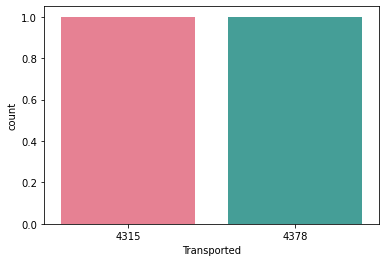

In [12]:
sns.countplot('Transported',data= df_transport,palette= 'husl')

#### Preparing columns for EDA
Splitting mixed datatypes features to new columns

In [13]:
# Train Set
#split PassengerId and Name to get group number and last name
spaceship['P_group']=spaceship['PassengerId'].str.split('_', 1).str[0]
spaceship['P_id']=spaceship['PassengerId'].str.split('_', 1).str[1]

spaceship['firstname']=spaceship['Name'].str.split(' ',1).str[0]
spaceship['lastname']=spaceship['Name'].str.split(' ',1).str[1]

spaceship['Cabin_deck']=spaceship['Cabin'].str.split('/',1).str[0]
spaceship['Cabin_num']=spaceship['Cabin'].str.split('/',1).str[1]
spaceship['Cabin_side']=spaceship['Cabin_num'].str.split('/',1).str[1]
spaceship['Cabin_num']=spaceship['Cabin_num'].str.split('/',1).str[0]

spaceship.drop('Cabin',axis=1,inplace=True)
spaceship.drop('Name',axis=1,inplace=True)
spaceship.drop('PassengerId',axis=1,inplace=True)

In [14]:
spaceship.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Maham,Ofracculy,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Juanna,Vines,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Altark,Susent,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,False,0003,02,Solam,Susent,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,True,0004,01,Willy,Santantines,F,1,S


In [15]:
# Test Set
#split PassengerId and Name to get group number and last name
spaceship_test['P_group']=spaceship_test['PassengerId'].str.split('_', 1).str[0]
spaceship_test['P_id']=spaceship_test['PassengerId'].str.split('_', 1).str[1]

spaceship_test['firstname']=spaceship_test['Name'].str.split(' ',1).str[0]
spaceship_test['lastname']=spaceship_test['Name'].str.split(' ',1).str[1]

spaceship_test['Cabin_deck']=spaceship_test['Cabin'].str.split('/',1).str[0]
spaceship_test['Cabin_num']=spaceship_test['Cabin'].str.split('/',1).str[1]
spaceship_test['Cabin_side']=spaceship_test['Cabin_num'].str.split('/',1).str[1]
spaceship_test['Cabin_num']=spaceship_test['Cabin_num'].str.split('/',1).str[0]

spaceship_test.drop('Cabin',axis=1,inplace=True)
spaceship_test.drop('Name',axis=1,inplace=True)
#spaceship_test.drop('PassengerId',axis=1,inplace=True)

In [16]:
spaceship['TotalSpend'] = spaceship['RoomService']+spaceship['FoodCourt']+spaceship['ShoppingMall']+spaceship['Spa']+spaceship['VRDeck']

In [17]:
spaceship_test.head()

,PassengerId,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side
0,0013_01,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,0013,01,Nelly,Carsoning,G,3,S
1,0018_01,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,0018,01,Lerome,Peckers,F,4,S
2,0019_01,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,0019,01,Sabih,Unhearfus,C,0,S
3,0021_01,Europa,False,TRAPPIST-1e,38.0,False,0.0,6652.0,0.0,181.0,585.0,0021,01,Meratz,Caltilter,C,1,S
4,0023_01,Earth,False,TRAPPIST-1e,20.0,False,10.0,0.0,635.0,0.0,0.0,0023,01,Brence,Harperez,F,5,S


### Univariate Analysis

Plotting categorical features vs Target variable (Transport).. understand some relation

In [18]:
#cat_colms = spaceship.select_dtypes(include= ['object','bool']).columns.to_list()
cat_colms = ['HomePlanet','CryoSleep','Destination','VIP','Cabin_deck','Cabin_side']

num_colms = spaceship.select_dtypes( exclude= ['object','bool']).columns.to_list()
num_colms

['Age',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'TotalSpend']

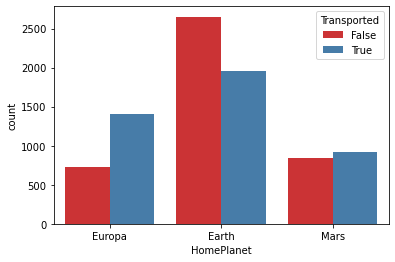

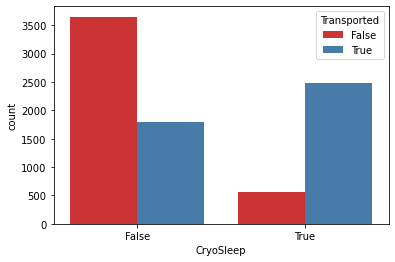

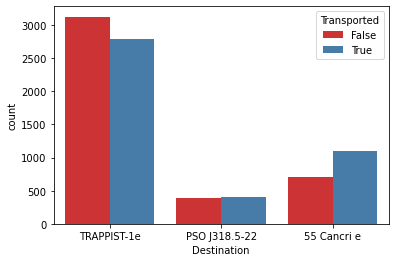

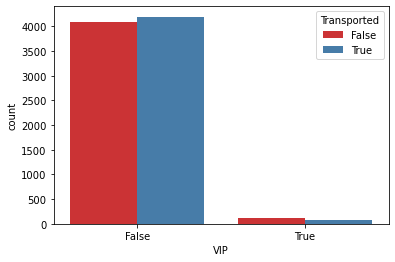

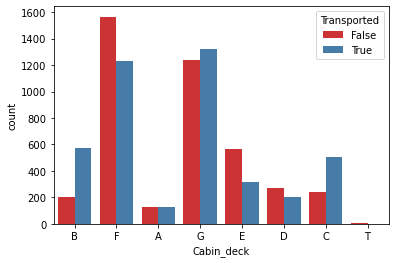

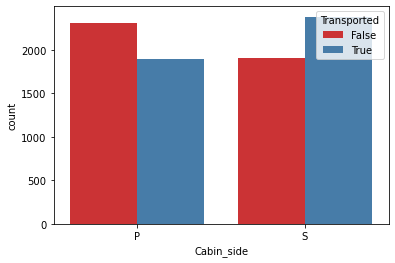

In [43]:
# use axis subplot
for i in cat_colms:
    sns.countplot(x=i, data= spaceship, hue='Transported',palette= 'Set1')

    #plt.xlabel,fontdict={'fontsize': '5', 'fontweight': '5', 'color': 'Yllow'})
    plt.show()

Now between Numerical featers Target variable

Text(0.5, 1.0, 'Transported w.r.t Age passngrs')

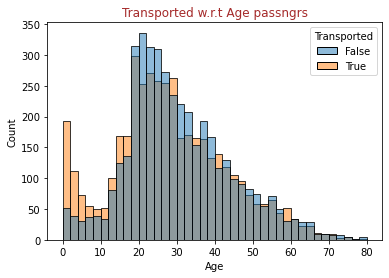

In [75]:
# Transpr
sns.histplot(data= spaceship,x= 'Age',hue= 'Transported',binwidth= 2)
plt.title('Transported w.r.t Age passngrs',fontdict={'color':'brown'})

Text(0.5, 1.0, 'Transported w.r.t expenditure of passngrs')

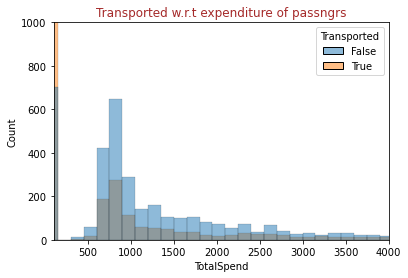

In [76]:
sns.histplot(data= spaceship,x= 'TotalSpend',hue= 'Transported')
plt.xlim(100,4000)
plt.ylim(0,1000)
plt.title('Transported w.r.t expenditure of passngrs',fontdict={'color':'brown'})

In [77]:
spaceship.TotalSpend.describe()

count     7785.000000
mean      1484.601541
std       2845.288241
min          0.000000
25%          0.000000
50%        736.000000
75%       1486.000000
max      35987.000000
Name: TotalSpend, dtype: float64

### Multivariate analysis

#### Passenger group,id

In [78]:
spaceship.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side,TotalSpend
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Maham,Ofracculy,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Juanna,Vines,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Altark,Susent,A,0,S,10383.0


In [79]:
# P_group 6grps not useful for nsight caz uniqu

df= spaceship.P_group.value_counts().to_frame()   # max. freq occurance a group is 8 i.e max no. of passeng.in group is 8

#spaceship.P_id.value_counts()  # id8 shows there are 13 groups with max 8 members

#pd.Series(spaceship.P_group.value_counts()==7)

In [80]:
df.reset_index(inplace= True)

In [81]:
df.rename(columns={'index':'P_grp','P_group':'Freq_grpnos'},inplace= True)

Text(0.5, 0, 'Passng_ID')

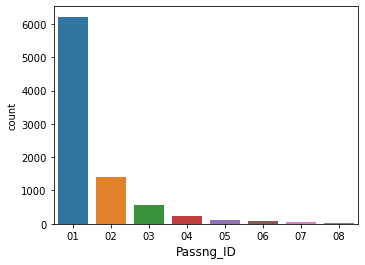

In [82]:
plt.figure(figsize= (12,4))
plt.subplot(1,2,1)

#sns.countplot(x= 'Freq_grpnos',data= df)
#plt.subplot(1,2,2)
sns.countplot(x='P_id',data= spaceship)
plt.xlabel('Passng_ID',fontdict={'fontsize': 12})


In [83]:
#df
#df.Freq_grpnos.value_counts()
df.Freq_grpnos=df.Freq_grpnos.astype(float)

In [84]:
#spaceship.loc[(spaceship['P_id']=='08'),: ]
#spaceship.loc[(spaceship['P_group']=='6120'),: ]   # with group freq=8,got groups with 8(max) members

In [85]:
#same group -> 1) Same HOmePlanet 2) ViP 3) Lastname almost same 4) cabn_side,deck,num 5) Median of ages of group 

#### CABIN feature

#### How many cabin_decks & cabin_sides were there on ship?
#### What age group people belong to on individual decks?


In [86]:
spaceship.Age.describe()

count    8514.000000
mean       28.827930
std        14.489021
min         0.000000
25%        19.000000
50%        27.000000
75%        38.000000
max        79.000000
Name: Age, dtype: float64

<AxesSubplot:xlabel='Age', ylabel='Count'>

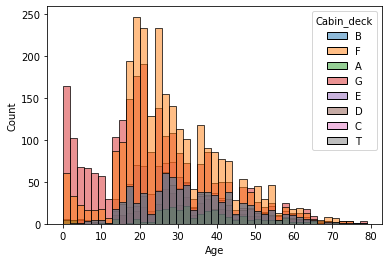

In [87]:
sns.histplot(x='Age',hue= 'Cabin_deck',data= spaceship)


#### ON Deck Homeplanet of passengers and what are their Destination

<AxesSubplot:xlabel='Cabin_deck', ylabel='count'>

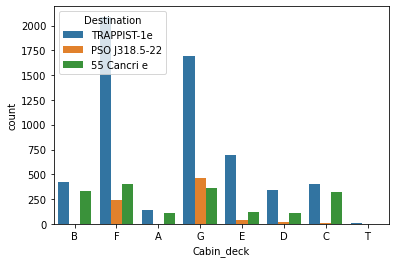

In [88]:
#sns.catplot(x= 'Cabin_deck',y= 'Transported',data= spaceship)
#sns.countplot(x='Cabin_deck',hue= 'HomePlanet',data= spaceship)
sns.countplot(x='Cabin_deck',hue= 'Destination',data= spaceship)

<AxesSubplot:xlabel='Cabin_deck', ylabel='Age'>

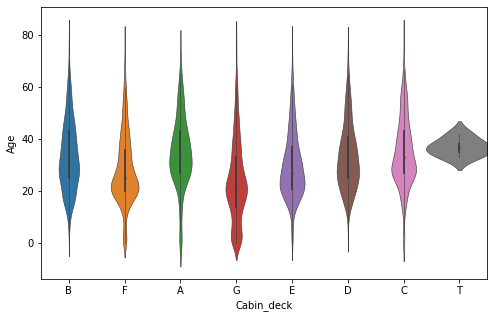

In [89]:
plt.figure(figsize=(8,5))
sns.violinplot(x= 'Cabin_deck',y= 'Age',data= spaceship,linewidth= (0.60),width= (1.2))

# On deck'A' most passngers are of age (25,35) while on deck'G' we have many kids of age around 10, 
# although most decks has passengrs of all age group except deck'T

<AxesSubplot:xlabel='Cabin_side', ylabel='Age'>

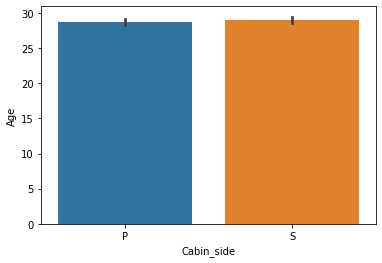

In [90]:
sns.barplot(x='Cabin_side',y= 'Age',data= spaceship)

In [91]:
# we found cabin for cabin_deck= A Cabin_no = 5 Cabin_side = (S,P) i.e cabin is divided into two sides having passengers on either side
# it shows that we should combine cabin no. & deck since each deck has unique cabin no. but divided into 2 sides

In [92]:
spaceship.loc[(spaceship['Cabin_deck']== 'F') & (spaceship['Cabin_num']== '500'),:]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side,TotalSpend
2424,Mars,True,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,True,2597,01,Want,Jamai,F,500,S,0.0
2425,NaN,False,55 Cancri e,31.0,False,995.0,7.0,1213.0,0.0,687.0,False,2597,02,Pikes,Jamai,F,500,S,2902.0


In [93]:
# since there each deck has difft. proportions of passngers -> difft. no. of cabins (deck A has less passngers, so cabin no. only till 105)
# so we impute mode('cabin num.')caz mode->cabinno. is availble in each deck,
#Ffill,BFill('deck','side') not mode caz all199 passng. do not go to same deck or side. also passng. not arranged sequentially 

In [94]:
spaceship.loc[(spaceship['P_group']=='1976') & (spaceship['Cabin_deck']=='B'), :]

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side,TotalSpend
1847,Europa,False,55 Cancri e,23.0,False,0.0,8037.0,NaN,1.0,2.0,True,1976,01,Sadirab,Craleve,B,82,S,NaN
1848,Europa,False,TRAPPIST-1e,34.0,False,15.0,3578.0,0.0,NaN,473.0,True,1976,02,Alam,Lansuffle,B,82,S,NaN
1849,Europa,True,55 Cancri e,26.0,True,0.0,0.0,0.0,0.0,0.0,True,1976,03,Cellah,Lansuffle,B,82,S,0.0
1850,Europa,False,TRAPPIST-1e,39.0,False,1.0,2972.0,0.0,3175.0,1.0,False,1976,04,Zinoth,Lansuffle,B,82,S,6149.0
1851,Europa,True,55 Cancri e,15.0,False,0.0,0.0,0.0,0.0,0.0,True,1976,05,Plas,Lansuffle,B,82,S,0.0
1852,Europa,True,TRAPPIST-1e,64.0,False,0.0,0.0,0.0,0.0,0.0,True,1976,06,Wasaleh,Lansuffle,B,82,S,0.0
1853,Europa,True,TRAPPIST-1e,25.0,False,0.0,0.0,0.0,0.0,0.0,True,1976,07,Alaslon,Craleve,B,82,S,0.0


Text(0.5, 1.0, 'Destination vs Transported vs CryoSleep')

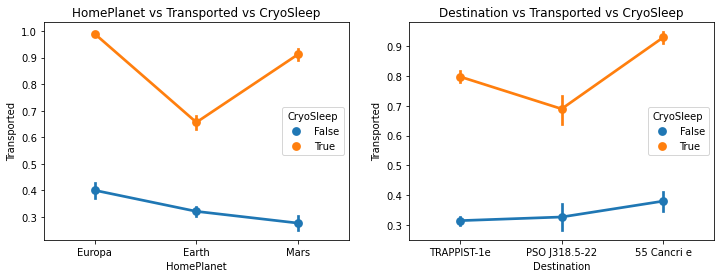

In [95]:
fig, ax = plt.subplots(1,2,figsize=(12,4))

sns.pointplot(x='HomePlanet',y='Transported',hue='CryoSleep',data=spaceship,kind='point',ax=ax[0])
ax[0].set_title('HomePlanet vs Transported vs CryoSleep')

sns.pointplot(x='Destination',y='Transported',hue='CryoSleep',data=spaceship,kind='point',ax=ax[1])
ax[1].set_title('Destination vs Transported vs CryoSleep')

#### HomePlanet

Text(0.5, 1.0, 'HomePlanet distribution')

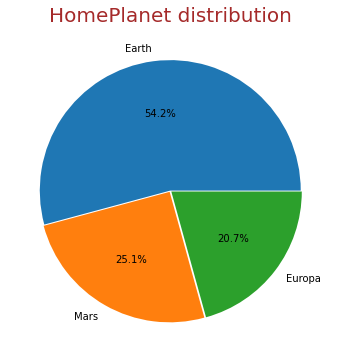

In [96]:
# homeplanet distribution
plt.figure(figsize= (6,6))
hf=spaceship.HomePlanet.value_counts()
plt.pie(x= hf,labels= ['Earth','Mars','Europa'],autopct= ('%.1f%%'),explode= (0.001,0.01,0.01))
plt.title('HomePlanet distribution',fontdict={'fontsize': 20,'color': 'brown' })

In [97]:
# Passengers with HomePlanet and Destination

<AxesSubplot:xlabel='HomePlanet', ylabel='count'>

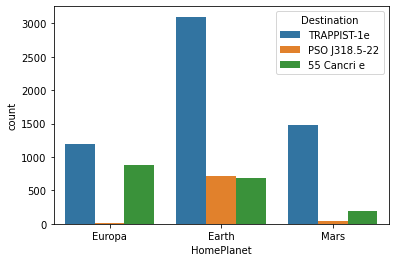

In [98]:
sns.countplot(x='HomePlanet',hue= 'Destination', data= spaceship)

#### CryoSleep

<AxesSubplot:xlabel='Age', ylabel='Count'>

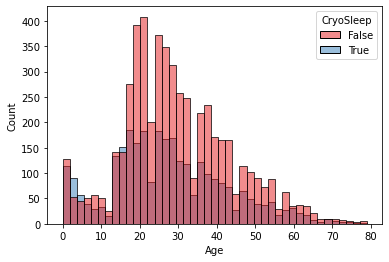

In [15]:
#sns.barplot(x='CryoSleep', y= 'Age',data= spaceship,color = 'brown')
sns.histplot(hue='CryoSleep', x= 'Age',data= spaceship,palette= 'Set1')


### Age 

<AxesSubplot:xlabel='Transported', ylabel='Age'>

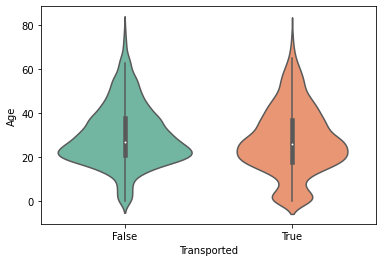

In [16]:
#sns.histplot(x='Age', hue = 'Transported',data = spaceship)
sns.violinplot(x='Transported', y= 'Age',data= spaceship,palette= 'Set2')
# people of range (15,40) were mostly transported 

#### Spends

(-1000.0, 10000.0)

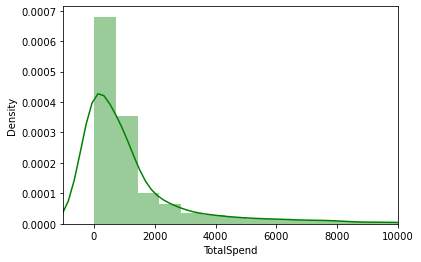

In [19]:
sns.distplot(spaceship.TotalSpend,color= 'g')
plt.xlim(-1000,10000)

#### Details of money spend by passngrs on luxary

In [20]:
# min nonzero total spend
spend_0=spaceship.loc[spaceship.TotalSpend==0,'TotalSpend'].count()
all_row=spaceship.loc[:,'TotalSpend'].count()
perntge = (spend_0/all_row)*100

print(f'Minimum spend of passngrs : {spaceship.TotalSpend.min()}')
print(f'Average money spend by passngrs : {spaceship.TotalSpend.mean()}')
print(f'Percentage of passngrs spending no money :- {perntge} %')

Minimum spend of passngrs : 0.0
Average money spend by passngrs : 1484.6015414258188
Percentage of passngrs spending no money :- 41.708413615928066 %


### Preprocessing for Model Building

In [ ]:
# finding NA values
def missing_percent(spaceship):
    percent_nan= 100* spaceship.isnull().sum()/len(spaceship)
    percent_nan= percent_nan[percent_nan>0].sort_values()
    
    return percent_nan

In [ ]:
percent_nan = missing_percent(spaceship)
pd.DataFrame(percent_nan,columns=['(%) missing values'])

In [ ]:
#sns.barplot(x=percent_nan.index, y= percent_nan)
#plt.xticks(rotation= 90)

#### Dealing with missing values, features encoding

In [ ]:
# we will use userdefined Categorical Encoding for CAtegorical features:( https://medium.com/data-design/visiting-categorical-features-and-encoding-in-decision-trees-53400fa65931)
# ont onehot encoding caz tree formation not uniformly distributed,instead restricts for one side only
# there is one more method TARGET ENCODING '
# LABEL encoding can be applied (it'll encode with simlr integrs like in user def.encod) but pattern learnin is issue


In [ ]:
#def cat_encoder(x):
#   return x.map({'Earth': 0,'Europa': 1,'Mars': 2, 'TRAPPIST-1e': 0, '55 Cancri e': 1,'PSO J318.5-22': 2, 'S': 0,'P': 1,'A':2, 'B':3, 'C':4, 'D':5, 'E':6, 'F':7, 'G':8, 'T':9 })

In [ ]:
#spaceship[l_cat]= spaceship[l_cat].apply(cat_encoder)
#spaceship[l_cat]= spaceship[l_cat].astype(int)

#### Passenger ID

In [ ]:
# PassengerID -> P_group , P_id
# converting both to integer datatype 
spaceship.P_group.astype(int)
spaceship.P_group.astype(int)
# drop it, not usefull for prediction since most values are unique

#### HomePlanet

In [ ]:
# same group -> 1) Same HOmePlanet 2) ViP 3) Lastname almost same 4) cabn_side,deck,num

In [ ]:
spaceship.HomePlanet.isnull().sum()

In [19]:
# Train Set: 
#step1 fillna
spaceship['HomePlanet']=spaceship['HomePlanet'].fillna(spaceship.groupby(['P_group'], sort=False)['HomePlanet'] .apply(lambda x: x.ffill().bfill()))
# left with 111 Nan for single groups

# step2 fillna
spaceship.HomePlanet.fillna(spaceship.HomePlanet.mode()[0],inplace= True)

In [20]:
# Test Set:
spaceship_test['HomePlanet']=spaceship_test['HomePlanet'].fillna(spaceship_test.groupby(['P_group'], sort=False)['HomePlanet'] .apply(lambda x: x.ffill().bfill()))
spaceship_test.HomePlanet.fillna(spaceship_test.HomePlanet.mode()[0],inplace= True)

In [21]:
#spaceship_test.loc[spaceship_test['P_group']=='1072',:]

#### VIP

In [22]:
#Train Set:-
# filling missing values using relation homeplanet
spaceship['VIP']=spaceship['VIP'].fillna(spaceship.groupby(['HomePlanet'], sort=False)['VIP'] .apply(lambda x: x.ffill().bfill()))

In [23]:
spaceship_test['VIP']=spaceship_test['VIP'].fillna(spaceship_test.groupby(['HomePlanet'], sort=False)['VIP'] .apply(lambda x: x.ffill().bfill()))

In [24]:
spaceship_test.VIP.isnull().sum()        # replace these 3 na with False, since people with missing record wud not be a VIP
#spaceship[spaceship.VIP.isnull()]

0

In [25]:
# step 2 fillna:-
spaceship.VIP.fillna('False',inplace= True)

#### CAbin

In [26]:
#spaceship['Cabin_side'].isnull().sum()
spaceship['Cabin_deck'].isnull().sum()
#spaceship['Cabin_num'].isnull().sum()

199

In [27]:
# Train Set >step 1:
# filling na values for cabin colms
spaceship['Cabin_side']=spaceship['Cabin_side'].fillna(spaceship.groupby(['P_group'], sort=False)['Cabin_side'] .apply(lambda x: x.ffill().bfill()))
spaceship['Cabin_deck']=spaceship['Cabin_deck'].fillna(spaceship.groupby(['P_group'], sort=False)['Cabin_side'] .apply(lambda x: x.ffill().bfill()))
# we are left with cabin 99 rows for unique p_group, same as above features
# we are gonna drop cabin_num, not usefull for model since most values are unique aroud(7000)

In [28]:
# step 2:
spaceship.Cabin_deck.fillna(spaceship.Cabin_deck.mode()[0],inplace= True)
spaceship.Cabin_side.fillna(spaceship.Cabin_side.mode()[0],inplace= True)

In [29]:
# filling na values for cabin colms
spaceship_test['Cabin_side']=spaceship_test['Cabin_side'].fillna(spaceship_test.groupby(['P_group'], sort=False)['Cabin_side'] .apply(lambda x: x.ffill().bfill()))
spaceship_test['Cabin_deck']=spaceship_test['Cabin_deck'].fillna(spaceship_test.groupby(['P_group'], sort=False)['Cabin_side'] .apply(lambda x: x.ffill().bfill()))

In [30]:
spaceship['Cabin_deck'].isnull().sum()

0

### Cryosleep

In [31]:
spaceship.CryoSleep.isnull().value_counts()

False    8476
True      217
Name: CryoSleep, dtype: int64

In [32]:
#sns.countplot(spaceship.HomePlanet,hue= spaceship.VIP)
#sns.countplot(spaceship.HomePlanet,hue= spaceship.CryoSleep)
#sns.countplot(spaceship.VIP,hue= spaceship.CryoSleep)

In [33]:
# step fillna
spaceship.CryoSleep.fillna(False,inplace= True)

In [34]:
# Test SEt
spaceship_test.CryoSleep.fillna(False,inplace= True)

In [35]:
spaceship_test.CryoSleep.isnull().sum()

0

### Destination

In [36]:
spaceship.Destination.isnull().sum()

182

In [37]:
spaceship.Destination.value_counts()

TRAPPIST-1e      5915
55 Cancri e      1800
PSO J318.5-22     796
Name: Destination, dtype: int64

In [38]:
spaceship.Destination.mode()

0    TRAPPIST-1e
dtype: object

In [39]:
# fillna Destination
spaceship.Destination.fillna(spaceship.Destination.mode()[0],inplace= True)


In [40]:
# Test Set
# fillna Destination
spaceship_test.Destination.fillna(spaceship_test.Destination.mode()[0],inplace= True)


In [41]:
#sns.countplot(spaceship.CryoSleep,hue=spaceship.Destination)
#sns.countplot(spaceship.HomePlanet,hue= spaceship.Destination)
#sns.countplot(spaceship.VIP,hue= spaceship.CryoSleep)

In [42]:
spaceship.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,P_group,P_id,firstname,lastname,Cabin_deck,Cabin_num,Cabin_side,TotalSpend
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,False,0001,01,Maham,Ofracculy,B,0,P,0.0
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,True,0002,01,Juanna,Vines,F,0,S,736.0
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,False,0003,01,Altark,Susent,A,0,S,10383.0


#### Nan imputation Numerical Features

#### Age

In [43]:
#sns.histplot(spaceship.Age)

In [44]:
# RoomService
spaceship.RoomService.isnull().sum()

181

In [45]:
# replacing by median since we don't have large range of values

spaceship.Age.fillna(spaceship.Age.median(),inplace= True)
spaceship.RoomService.fillna(spaceship.RoomService.median(),inplace=True)
spaceship.FoodCourt.fillna(spaceship.FoodCourt.median(),inplace= True)
spaceship.ShoppingMall.fillna(spaceship.ShoppingMall.median(),inplace= True)
spaceship.Spa.fillna(spaceship.Spa.median(),inplace= True)
spaceship.VRDeck.fillna(spaceship.VRDeck.median(),inplace= True)


In [46]:
spaceship['TotalSpend'] = spaceship['RoomService']+spaceship['FoodCourt']+spaceship['ShoppingMall']+spaceship['Spa']+spaceship['VRDeck']

In [47]:
# TEST SET
# replacing by median since we don't have large range of values

spaceship_test.Age.fillna(spaceship_test.Age.median(),inplace= True)
spaceship_test.RoomService.fillna(spaceship_test.RoomService.median(),inplace=True)
spaceship_test.FoodCourt.fillna(spaceship_test.FoodCourt.median(),inplace= True)
spaceship_test.ShoppingMall.fillna(spaceship_test.ShoppingMall.median(),inplace= True)
spaceship_test.Spa.fillna(spaceship_test.Spa.median(),inplace= True)
spaceship_test.VRDeck.fillna(spaceship_test.VRDeck.median(),inplace= True)


In [48]:
spaceship_test['TotalSpend'] = spaceship_test['RoomService']+spaceship_test['FoodCourt']+spaceship_test['ShoppingMall']+spaceship_test['Spa']+spaceship_test['VRDeck']

In [49]:
# def n_imputer(x):
# return spaceship.x.fillna(spaceship.x.median(),inplace= True)

In [50]:
# we are done with NA Values 

##### Dropping unnecessary columns

In [51]:
spaceship.drop(columns=['P_id','firstname','lastname','P_group','Cabin_num'],inplace= True)

In [52]:
spaceship_Test= spaceship_test.drop(columns=['PassengerId','P_id','firstname','lastname','P_group','Cabin_num'])
#spaceship_Test= spaceship_Test.drop(columns= ['Passenger_Id'])

In [56]:
spaceship_Test.head(3)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Cabin_deck,Cabin_side,TotalSpend
0,Earth,True,TRAPPIST-1e,27.0,False,0.0,0.0,0.0,0.0,0.0,G,S,0.0
1,Earth,False,TRAPPIST-1e,19.0,False,0.0,9.0,0.0,2823.0,0.0,F,S,2832.0
2,Europa,True,55 Cancri e,31.0,False,0.0,0.0,0.0,0.0,0.0,C,S,0.0


#### Encoding 

In [78]:
# Encoding TRAIN SET

In [58]:
# Encoding True False colms at a time

spaceship.CryoSleep= spaceship.CryoSleep.astype(int)
spaceship.VIP= spaceship.VIP.astype(int)
spaceship.Transported= spaceship.Transported.astype(int)

In [59]:
cat_colms = spaceship.select_dtypes( exclude= ['float','int']).columns.to_list()
cat_colms

catencoded_colms= pd.get_dummies(spaceship[cat_colms],drop_first= True)
catencoded_colms.info()

nume_colms= spaceship.select_dtypes(include= ['float','int']).columns.to_list()

numerical_colms=spaceship[nume_colms]
numerical_colms

# Concatnating to make new dataframe 

x= pd.concat([catencoded_colms,numerical_colms],axis= 1)
x

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   HomePlanet_Europa          8693 non-null   uint8
 1   HomePlanet_Mars            8693 non-null   uint8
 2   Destination_PSO J318.5-22  8693 non-null   uint8
 3   Destination_TRAPPIST-1e    8693 non-null   uint8
 4   Cabin_deck_B               8693 non-null   uint8
 5   Cabin_deck_C               8693 non-null   uint8
 6   Cabin_deck_D               8693 non-null   uint8
 7   Cabin_deck_E               8693 non-null   uint8
 8   Cabin_deck_F               8693 non-null   uint8
 9   Cabin_deck_G               8693 non-null   uint8
 10  Cabin_deck_P               8693 non-null   uint8
 11  Cabin_deck_S               8693 non-null   uint8
 12  Cabin_deck_T               8693 non-null   uint8
 13  Cabin_side_S               8693 non-null   uint8
dtypes: uint8(14)
memory usag

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,...,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Transported,TotalSpend
0,1,0,0,1,1,0,0,0,0,0,...,0,39.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
1,0,0,0,1,0,0,0,0,1,0,...,0,24.0,0,109.0,9.0,25.0,549.0,44.0,1,736.0
2,1,0,0,1,0,0,0,0,0,0,...,0,58.0,1,43.0,3576.0,0.0,6715.0,49.0,0,10383.0
3,1,0,0,1,0,0,0,0,0,0,...,0,33.0,0,0.0,1283.0,371.0,3329.0,193.0,0,5176.0
4,0,0,0,1,0,0,0,0,1,0,...,0,16.0,0,303.0,70.0,151.0,565.0,2.0,1,1091.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,1,0,0,0,0,0,0,0,0,0,...,0,41.0,1,0.0,6819.0,0.0,1643.0,74.0,0,8536.0
8689,0,0,1,0,0,0,0,0,0,1,...,1,18.0,0,0.0,0.0,0.0,0.0,0.0,0,0.0
8690,0,0,0,1,0,0,0,0,0,1,...,0,26.0,0,0.0,0.0,1872.0,1.0,0.0,1,1873.0
8691,1,0,0,0,0,0,0,1,0,0,...,0,32.0,0,0.0,1049.0,0.0,353.0,3235.0,0,4637.0


In [60]:
# ENCODING TEST SET

In [61]:
# Encoding True False colms at a time

spaceship_Test.CryoSleep= spaceship_Test.CryoSleep.astype(int)
spaceship_Test.VIP= spaceship_Test.VIP.astype(int)


In [62]:
cat_colmst = spaceship_Test.select_dtypes( exclude= ['float','int']).columns.to_list()
#cat_colmst

catencoded_colmst= pd.get_dummies(spaceship_Test[cat_colms],drop_first= True)
#catencoded_colmst.info()

nume_colmst= spaceship_Test.select_dtypes(include= ['float','int']).columns.to_list()

numerical_colmst=spaceship_Test[nume_colmst]
#numerical_colmst

# concatnating to make new dataframe 
xtest= pd.concat([catencoded_colmst,numerical_colmst],axis= 1)
# xtest

### x.head()

<AxesSubplot:>

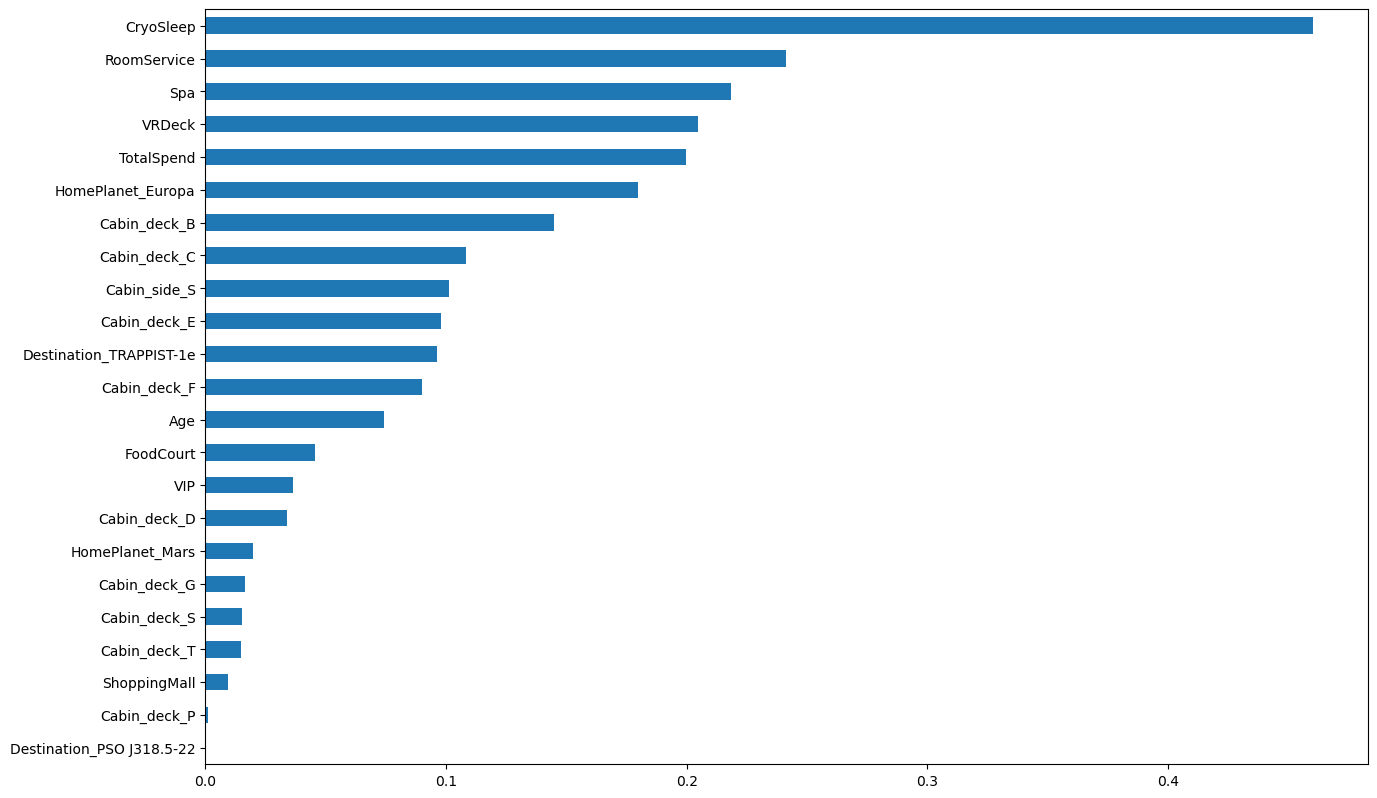

In [63]:
plt.figure(figsize=(15,10),dpi=100)
x.corr().Transported.abs().sort_values(ascending=True).iloc[:-1].plot.barh()

<AxesSubplot:>

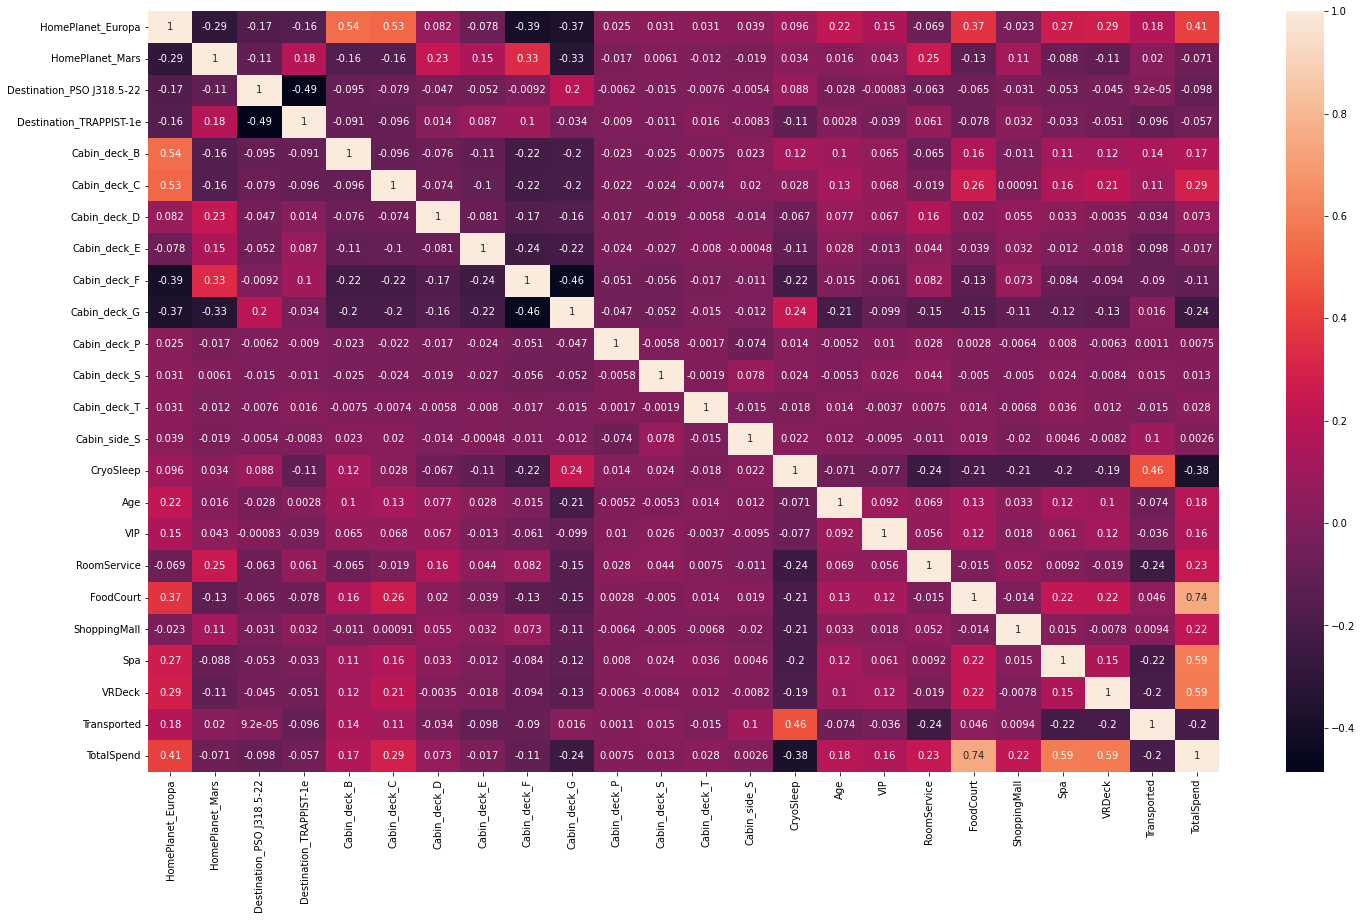

In [64]:
plt.figure(figsize= (24,14))
sns.heatmap(x.corr(),annot= True)

Checking skewness of numerical features 

In [65]:
#SimpleImputer(strategy="most_frequent")),
#("oh-encode", OneHotEncoder(handle_unknown="ignore", sparse=False)),


### Train test split

In [66]:
x= x.drop(columns=['Transported'])
y= numerical_colms['Transported']

In [67]:

from sklearn.model_selection import train_test_split

In [68]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size= 0.30, random_state= 101)

In [69]:
x_train.shape
#y_train.shape

(6085, 23)

In [88]:
x_test.shape

(2608, 23)

Normalizing dataset

### Normalization 

In [70]:
from sklearn.preprocessing import MinMaxScaler

In [71]:
normalize = MinMaxScaler()

In [72]:
# TRAIN SET

In [73]:
l_num = x_train.columns.to_list()

In [74]:
x_train = normalize.fit_transform(x_train[l_num])
x_test = normalize.transform(x_test[l_num])

x_trainsc= pd.DataFrame(data= x_train,columns= l_num)
x_testsc = pd.DataFrame(data= x_test, columns= l_num)

In [75]:
#x_trainsc.columns.astype(int)
#x_testsc.columns.astype(int)

In [76]:
# TEST SET

In [77]:
l_numt= xtest.columns.to_list()
l_numt

['HomePlanet_Europa',
 'HomePlanet_Mars',
 'Destination_PSO J318.5-22',
 'Destination_TRAPPIST-1e',
 'Cabin_deck_B',
 'Cabin_deck_C',
 'Cabin_deck_D',
 'Cabin_deck_E',
 'Cabin_deck_F',
 'Cabin_deck_G',
 'Cabin_deck_P',
 'Cabin_deck_S',
 'Cabin_deck_T',
 'Cabin_side_S',
 'CryoSleep',
 'Age',
 'VIP',
 'RoomService',
 'FoodCourt',
 'ShoppingMall',
 'Spa',
 'VRDeck',
 'TotalSpend']

In [78]:
xtest1 = normalize.transform(xtest[l_num])

In [79]:
xtestsc = pd.DataFrame(data= xtest1, columns= l_num)

In [80]:

xtestsc.head()

,HomePlanet_Europa,HomePlanet_Mars,Destination_PSO J318.5-22,Destination_TRAPPIST-1e,Cabin_deck_B,Cabin_deck_C,Cabin_deck_D,Cabin_deck_E,Cabin_deck_F,Cabin_deck_G,...,Cabin_side_S,CryoSleep,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,TotalSpend
0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,0.341772,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.240506,0.0,0.000000,0.000325,0.000000,0.125982,0.000000,0.078695
2,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,1.0,0.392405,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.481013,0.0,0.000000,0.239945,0.000000,0.008077,0.024241,0.206130
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,0.253165,0.0,0.000698,0.000000,0.060917,0.000000,0.000000,0.017923


### Importing necessary libraries

In [81]:
# 

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import GradientBoostingClassifier

from sklearn.experimental import enable_hist_gradient_boosting  # enabling experimental feature in environmnt 

from sklearn.ensemble import HistGradientBoostingClassifier


from sklearn.model_selection import GridSearchCV

# Performance metrices


from sklearn.model_selection import cross_val_score,cross_validate

from sklearn import metrics
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_auc_score, roc_curve, auc

### Logistic regression

In [82]:
logimodel = LogisticRegression()

In [83]:
logimodel.fit(x_trainsc, y_train)

LogisticRegression()

In [115]:
logipred = logimodel.predict(x_testsc)

In [117]:
accuracy_score(y_test,logipred)

0.7776073619631901

In [108]:
print(classification_report(y_test,logipred))

              precision    recall  f1-score   support

           0       0.75      0.83      0.79      1299
           1       0.81      0.73      0.77      1309

    accuracy                           0.78      2608
   macro avg       0.78      0.78      0.78      2608
weighted avg       0.78      0.78      0.78      2608



In [ ]:
# manual encoding: 77%, dummy: 78%

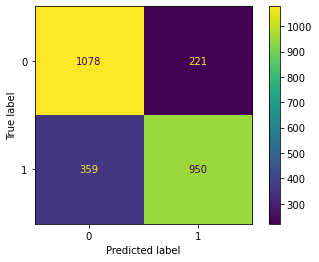

In [121]:
plot_confusion_matrix(logimodel, x_testsc, y_test)

### KNN Algorithm 

In [109]:
from sklearn.neighbors import KNeighborsClassifier

In [110]:
knnmodel = KNeighborsClassifier()
knnmodel.fit(x_trainsc,y_train)

KNeighborsClassifier()

In [111]:
knnpred = knnmodel.predict(x_testsc)

In [112]:
print(classification_report(y_test,knnpred))

              precision    recall  f1-score   support

           0       0.75      0.77      0.76      1299
           1       0.77      0.74      0.75      1309

    accuracy                           0.76      2608
   macro avg       0.76      0.76      0.76      2608
weighted avg       0.76      0.76      0.76      2608



In [ ]:
# earlier 75%, dummify: 76

### Decision Tree

In [37]:
dtmodel = DecisionTreeClassifier()

In [38]:
dtmodel.fit(x_trainsc,y_train)

DecisionTreeClassifier()

In [39]:
dtpred = dtmodel.predict(x_testsc)

In [40]:
print(classification_report(y_test,dtpred))

              precision    recall  f1-score   support

           0       0.78      0.75      0.76      1299
           1       0.76      0.79      0.77      1309

    accuracy                           0.77      2608
   macro avg       0.77      0.77      0.77      2608
weighted avg       0.77      0.77      0.77      2608



In [ ]:
# manual encoding :74 % , dummyfy: 77%

### Random Forest Model

In [41]:
rfmodel = RandomForestClassifier()

In [42]:
rfmodel.fit(x_trainsc,y_train)

RandomForestClassifier()

In [43]:
rfpred= rfmodel.predict(x_testsc)

In [44]:
print(classification_report(y_test,rfpred))

              precision    recall  f1-score   support

           0       0.76      0.84      0.80      1299
           1       0.82      0.74      0.78      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



#### Hyperparameter Tuning using GridSearch CV

In [41]:
# finding exact no. of estimators

errors= []
misclassifications= []

for n in range(138,165):
    
    rfc= RandomForestClassifier(n_estimators= n, max_features=10)
    rfc.fit(x_trainsc, y_train)
    pred= rfc.predict(x_testsc)
    err= 1- accuracy_score(y_test,pred)
    n_missed= np.sum(pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)
    

In [49]:
a= pd.DataFrame(errors,columns=['errors'],index)
#a.set_index(list(range(138,165)))
#a.index.set_names('estimator',inplace= True)


In [51]:
#misclassifications
m=pd.DataFrame(misclassifications,index=(list(range(138,165))),columns=['misclassification'])
m

,misclassification
138,560
139,553
140,547
141,535
142,556
143,544
144,551
145,559
146,546
147,547


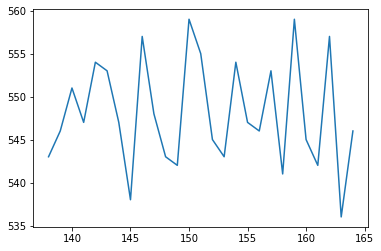

In [94]:
#plt.plot(range(138,165),errors)
plt.plot(range(138,165),misclassifications)
# for n_estimators 163 : 536 misclassi. i.e minimum

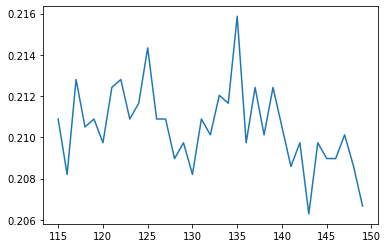

In [89]:

plt.plot(range(115,150),errors)

In [159]:
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score

In [160]:
RFCV= RandomForestClassifier()

In [161]:
bootstrap= [True,False]
oob_score:[True,False]

In [162]:
params_grid={'n_estimators': [140,150], 'max_features': [7,8,9,10], 'bootstrap': [True,False],'oob_score':[True,False]}

In [163]:
rfgrid = GridSearchCV(RFCV, params_grid)

In [164]:
rfgrid.fit(x_trainsc,y_train)

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py", line 598, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\hp\anaconda3\lib\site-packages\sklearn\ensemble\_forest.py", line 352, in fit
    raise ValueError("Out of bag estimation only available"
ValueError: Out of bag estimation only available if bootstrap=True

  warnings.warn("Estimator fit failed. The score on this train-test"
C:\Users\hp\anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:615: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "C:\Users\hp\anaconda3\lib\site-pack

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'bootstrap': [True, False],
                         'max_features': [7, 8, 9, 10],
                         'n_estimators': [140, 150],
                         'oob_score': [True, False]})

In [165]:
rfgrid.best_params_
# test1: 'max_features': 3, 'n_estimators': 128,
# test2: 'max_features': 7, 'n_estimators': 140,

{'bootstrap': True, 'max_features': 9, 'n_estimators': 150, 'oob_score': False}

In [166]:
# now fittng model on bestparams

rfcv1= RandomForestClassifier(bootstrap= True, max_features=9 , n_estimators= 150, oob_score= True)

In [167]:
rfcv1.fit(x_trainsc,y_train)

RandomForestClassifier(max_features=9, n_estimators=150, oob_score=True)

In [168]:
y_predrcv= rfcv1.predict(x_testsc)

In [169]:
print(classification_report(y_test,y_predrcv))
# accuracy max_feture: 10, n_estimator: 163

              precision    recall  f1-score   support

           0       0.77      0.82      0.79      1299
           1       0.81      0.76      0.78      1309

    accuracy                           0.79      2608
   macro avg       0.79      0.79      0.79      2608
weighted avg       0.79      0.79      0.79      2608



#### Cross Validate

In [ ]:
# Cross validate 
from sklearn.model_selection import cross_validate,cross_val_predict,cross_val_score

In [ ]:
rfcv1= RandomForestClassifier(max_features= 7, n_estimators= 1)

In [70]:
scores= cross_validate(rfcv1,x_trainsc,y_train,cv= 5 )

In [72]:
scores= pd.DataFrame(scores)

scores.mean()

fit_time      1.240544
score_time    0.053121
test_score    0.788661
dtype: float64

### Adaboost Classifier

In [170]:
from sklearn.ensemble import AdaBoostClassifier

In [171]:
model = AdaBoostClassifier(n_estimators= 119)

In [172]:
model.fit(x_trainsc,y_train)

AdaBoostClassifier(n_estimators=119)

In [173]:
adapred = model.predict(x_test)

In [174]:
print(classification_report(y_test,adapred))
# learing rate =1, n_estim. 150 : 80%  cross_valid: 78%
# learn.rate= default , n_estimator 119 : 80% , cross_valid: 79.601%
# n_est: 

              precision    recall  f1-score   support

           0       0.82      0.76      0.79      1299
           1       0.78      0.83      0.80      1309

    accuracy                           0.80      2608
   macro avg       0.80      0.80      0.80      2608
weighted avg       0.80      0.80      0.80      2608



In [175]:
accuracy_score(y_test,adapred)

0.7960122699386503

In [176]:
model.feature_importances_

array([0.01680672, 0.01680672, 0.00840336, 0.01680672, 0.00840336,
       0.02521008, 0.00840336, 0.00840336, 0.00840336, 0.00840336,
       0.        , 0.        , 0.        , 0.01680672, 0.02521008,
       0.11764706, 0.00840336, 0.08403361, 0.10084034, 0.12605042,
       0.14285714, 0.1092437 , 0.14285714])

#### Hyper parameter optimization 
Method 1:

In [177]:
from sklearn.metrics import accuracy_score

In [178]:
errors= []
misclassifications= []

for n in range(110,250):
    
    adab= RandomForestClassifier(n_estimators= n)
    adab.fit(x_trainsc, y_train)
    pred= adab.predict(x_testsc)
    err= 1- accuracy_score(y_test,pred)
    n_missed= np.sum(pred != y_test)
    
    errors.append(err)
    misclassifications.append(n_missed)
    

Text(0, 0.5, 'errors')

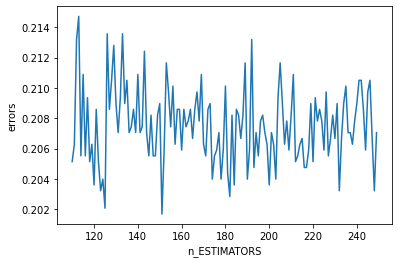

In [179]:
plt.plot(range(110,250),errors)
plt.xlabel('n_ESTIMATORS')
plt.ylabel('errors')

# OUtput : Best n_estimator 130, for min error

In [180]:
a= pd.DataFrame(misclassifications,columns=['misclassification'],index= (list(range(110,250))))

In [181]:
a.misclassification.min()

526

In [182]:
a.loc[a.misclassification==526,]
# i.e we have two n_estimators for min misclasification

,misclassification
151,526


Hyper Parametr Optimization 
Method 2:

In [50]:
from sklearn.model_selection import GridSearchCV

In [191]:
adamodel= AdaBoostClassifier()

In [192]:
grid_params= {'learning_rate' :[0.4,0.6,0.7,0.8,0.10],'n_estimators': [130,151,170]}

In [193]:
ada_grid= GridSearchCV(adamodel, grid_params)

In [194]:
ada_grid.fit(x_trainsc,y_train)

GridSearchCV(estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.4, 0.6, 0.7, 0.8, 0.1],
                         'n_estimators': [130, 151, 170]})

In [195]:
ada_grid.best_params_
# {'learning_rate': 0.6, 'n_estimators': 170}

{'learning_rate': 0.6, 'n_estimators': 170}

In [189]:
agrid_pred=ada_grid.predict(x_test)

In [ ]:
print(accuracy_score())

#### Cross Validation

In [197]:
# Cross validation for hper.param.optim.1 : 
score=cross_validate(ada_grid, x_trainsc,y_train,cv=5)

In [199]:
score

{'fit_time': array([58.29459429, 59.26384759, 63.09915662, 61.73733068, 57.56883097]),
 'score_time': array([0.07811594, 0.06249237, 0.07812047, 0.07811928, 0.06249213]),
 'test_score': array([0.7978636 , 0.80279376, 0.76006574, 0.78718159, 0.78964667])}

In [200]:
scores= pd.DataFrame(score)
scores.mean()

fit_time      59.992752
score_time     0.071868
test_score     0.787510
dtype: float64

### Gradient BOssting classifier

In [84]:
from sklearn.ensemble import HistGradientBoostingClassifier

In [85]:
hsgb= HistGradientBoostingClassifier()

hsgb.fit(x_trainsc,y_train)

In [87]:
hsgb_pred= hsgb.predict(x_testsc)

In [88]:
accuracy_score(y_test,hsgb_pred)
# default: 
0.8086656441717791

0.8086656441717791

In [89]:
print(classification_report(y_test,hsgb_pred))

              precision    recall  f1-score   support

           0       0.82      0.78      0.80      1299
           1       0.80      0.83      0.81      1309

    accuracy                           0.81      2608
   macro avg       0.81      0.81      0.81      2608
weighted avg       0.81      0.81      0.81      2608



#### HyperParameter Optimization

In [90]:
hsgb= HistGradientBoostingClassifier()

In [91]:
params_grid= {'learning_rate': [0.5,0.2,0.5,0.7], 'max_depth': [3,5,8], 'max_leaf_nodes': [25,30,33,40]}

In [92]:
hgrid= GridSearchCV(hsgb, params_grid)

In [93]:
hgrid.fit(x_trainsc,y_train)

GridSearchCV(estimator=HistGradientBoostingClassifier(),
             param_grid={'learning_rate': [0.5, 0.2, 0.5, 0.7],
                         'max_depth': [3, 5, 8],
                         'max_leaf_nodes': [25, 30, 33, 40]})

In [94]:
hgrid.best_params_

{'learning_rate': 0.5, 'max_depth': 3, 'max_leaf_nodes': 25}

In [95]:
hgrid_pred= hgrid.predict(x_testsc)

In [107]:
accuracy_score(hgrid_pred,y_test)

0.8044478527607362

#### Cross validation score

In [96]:
scores=cross_validate(hsgb, x_trainsc,y_train,scoring=['accuracy'])
# for classification (y_train) default stratified kfold: mtrics-accuracy

In [97]:
scores

{'fit_time': array([1.35193825, 1.36293149, 1.37490177, 1.40229154, 1.35317397]),
 'score_time': array([0.02412891, 0.01562476, 0.015625  , 0.01562405, 0.01562333]),
 'test_accuracy': array([0.82251438, 0.8093673 , 0.76581758, 0.79457683, 0.80032868])}

In [98]:
scores=pd.DataFrame(scores)

In [99]:
scores.mean()
# 79.835% -> 80%

fit_time         1.369047
score_time       0.017325
test_accuracy    0.798521
dtype: float64

#### ROC AUC CURVE

In [102]:
hsgb= HistGradientBoostingClassifier()

hsgb.fit(x_trainsc,y_train)

HistGradientBoostingClassifier()

In [100]:
from sklearn.metrics import roc_curve, auc

In [104]:
preds1 = hsgb.predict_proba(x_testsc)[:,1]
print(preds1.shape)

(2608,)


In [105]:
fpr1, tpr1, thresholds1 = metrics.roc_curve(y_test,preds1 )

In [106]:
#df1 = pd.DataFrame(dict(fpr = fpr1, tpr = tpr1))
auc = metrics.auc(fpr1, tpr1)

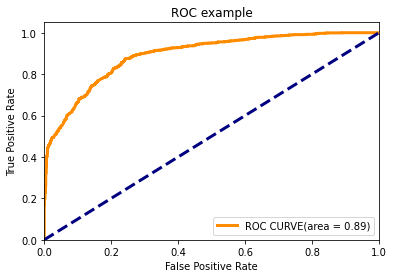

In [107]:
plt.figure()
lw =3 # linewidth
plt.plot(fpr1, tpr1, color = 'darkorange', lw = lw, label = 'ROC CURVE(area = %0.2f)' % auc)
plt.plot([0,1],[0,1], color = 'navy', lw = lw, linestyle = '--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title('ROC example')
plt.legend(loc = 'lower right')
plt.show()


#### final Prediction on Test dataset
    HistGradient Boosting technique is performing quite well with accuracy_score (81%) and Mean cross_validatation accuracy (80%)

In [109]:
predict= hsgb.predict(xtestsc)

output = pd.DataFrame({'PassengerId': spaceship_test.PassengerId, 'Transported': predict})
output['Transported'] = output['Transported'].astype('bool')


In [110]:
output.to_csv('C:/Users/hp/Downloads/submission3.csv',index= False)

So predicting using histgradient boosting... since this model seems to have no significant sign of overfitting so far....

In [153]:
pd.read_csv('C:/Users/hp/Downloads/submission2.csv')

,Unnamed: 0,PassengerId,Transported
0,0,1,False
1,1,1,False
2,2,1,True
3,3,1,False
4,4,1,True
...,...,...,...
4272,4272,2,False
4273,4273,1,False
4274,4274,1,True
4275,4275,1,False
